<a href="https://colab.research.google.com/github/beedrumms/Vax-Tweets-in-Ontario/blob/main/Topic_Modeling_Vax_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Latent Dirichlet Allocation (LDA) will be used to analyze tweets and identify themes discussed in relation to covid-19 vaccines

In [ ]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis

!pip install -U scikit-learn # updating sklearn to avoid depreciation warnings
!pip install --upgrade pandas==1.2  # Need to upgrade pandas to get pyLDAvis to work 

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

In [ ]:
# now Im going to upload my test set - which is just my Ontario covid tweets data scraped using sncrape
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vax_tweets_sents.csv')
tweets_df = data.iloc[:, 1:]
tweets_list = tweets_df['Text'].tolist()

# LDA w/ Sklearn

In [4]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf = tf_vectorizer.fit_transform(tweets_list) # document-term matrix
alpha = 1     #Dirichlet prior of document-topic dist
beta = 0.05   #Dirichlet prior of topic-term dist

In [5]:
# 4 TOPICS 
lda_model4 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf) # pre-trained LDA model

In [ ]:
# 8 TOPICS
# lda_model8 = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 16 TOPICS
# lda_model16 = LatentDirichletAllocation(n_components=16, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 20 TOPICS
# lda_model20 = LatentDirichletAllocation(n_components=20, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [6]:
# A model with a lower perplexity (exp(-1. * log-likelihood per word)) and higher log-likelihood is ideal 
print('Model Perplexity - 4 Topics:',lda_model4.perplexity(tf, sub_sampling = False)) ### Model Perplexity - 4 Topics: 19503.081767224226
print('Model Log-Likelihood - 4 Topics:', lda_model4.score(tf)) ### Model Log-Likelihood - 4 Topics: -146284678.79543173

# print('Model Perplexity - 8 Topics:',lda_model8.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 8 Topics:', lda_model8.score(tf))

# print('Model Perplexity - 16 Topics:',lda_model16.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 16 Topics:', lda_model16.score(tf))

# print('Model Perplexity - 20 Topics:',lda_model20.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 20 Topics:', lda_model20.score(tf))

Model Perplexity - 4 Topics: 4887.678513822829
Model Log-Likelihood - 4 Topics: -3207351.507184198


In [ ]:
# Looking at our scores above, the best performing k is 4 topics because it has the lowest perplexity and highest log-likelihood compared to the other k values
  # Therefore, I will try some k values around 4 to see if any better scores can be achieved

In [7]:
# 2 TOPICS
# lda_model2 = LatentDirichletAllocation(n_components=2, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 3 TOPICS
lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 5 TOPICS
# lda_model5 = LatentDirichletAllocation(n_components=5, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 6 TOPICS
# lda_model6 = LatentDirichletAllocation(n_components=6, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [8]:
# print('Model Perplexity - 2 Topics:',lda_model2.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 2 Topics:', lda_model2.score(tf))

print('Model Perplexity - 3 Topics:',lda_model3.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 3 Topics:', lda_model3.score(tf))

# print('Model Perplexity - 5 Topics:',lda_model5.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 5 Topics:', lda_model5.score(tf))
 
# print('Model Perplexity - 6 Topics:',lda_model6.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 6 Topics:', lda_model6.score(tf))

Model Perplexity - 3 Topics: 4964.381792771562
Model Log-Likelihood - 3 Topics: -3213230.944591461


In [10]:
# Topic words 
for index, topic in enumerate(lda_model4.components_):
    print(f'Top 15 words for Topic #{index}')
    print([tf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-26:]])
    print('\n')

Top 15 words for Topic #0
['certificate', 'vax passport', 'come', 'implement', 'province', 'liberal', 'say', 'anti', 'ford', 'vote', 'need', 'health', 'government', 'support', 'vaccine mandate', 'canadian', 'country', 'trudeau', 'mandatory', 'canada', 'ontario', 'mandate', 'vaccination', 'vaccine passport', 'passport', 'vaccine']


Top 15 words for Topic #1
['infection', 'status', 'death', 'people vaccinate', 'stop', 'sick', 'high', 'science', 'hospital', 'person', 'immunity', 'die', 'child', 'number', 'protect', 'vaccinate people', 'risk', 'case', 'virus', 'unvaccinated', 'fully vaccinate', 'fully', 'spread', 'covid', 'people', 'vaccinate']


Top 15 words for Topic #2
['approve', 'tell', 'vaccination', 'cause', 'test', 'world', 'dose', 'virus', 'booster', 'stop', 'push', 'pass', 'new', 'covid vaccine', 'variant', 'effect', 'day', 'shot', 'month', 'long', 'time', 'year', 'know', 'covid', 'vax', 'vaccine']


Top 15 words for Topic #3
['stop', 'live', 'choose', 'life', 'good', 'vaccine n

In [11]:
# Creating LDA plot of best topic # 
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model4, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)   

In [12]:
# Getting predicted topic for each tweet 
tweet_topics = lda_model4.transform(tf)

Topic_Assigned = [] 
for t in range(tweet_topics.shape[0]):
  predicted_topic = tweet_topics[t].argmax()
  Topic_Assigned.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic'] = Topic_Assigned
tweets_df[:3]

[3, 2, 2, 3, 2, 1, 0, 2, 2, 0]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Topic
0,2021-08-28,vaccine passport racist blackface support raci...,Vaccine passports are RACIST and blackface s...,-0.4648,3
1,2021-08-28,million people take vaccine effect die take ja...,Millions of people have taken the vaccin...,-0.8823,2
2,2021-08-28,fear ground real event ask logic critical thin...,"So your fear is grounded in a real event, ...",-0.5431,2


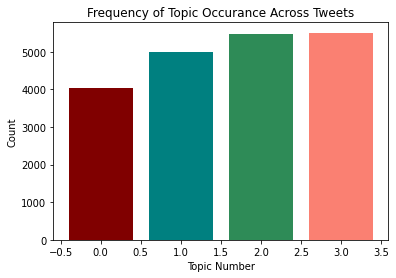

In [13]:
num_topics = tweets_df['Topic'].unique()
topic_counts = tweets_df['Topic'].value_counts()

plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'seagreen', 'teal', 'maroon'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Topic Occurance Across Tweets")
plt.rc('figure', figsize=(9,9))
plt.show()

In [16]:
def get_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keys = get_topics(tf_vectorizer, lda_model4, 40)

df_topic_keys = pd.DataFrame(topic_keys)
df_topic_keys.columns = ['Word '+str(i) for i in range(df_topic_keys.shape[1])]
df_topic_keys.index = ['Topic '+str(i) for i in range(df_topic_keys.shape[0])]

In [17]:
# Getting top words for each topic 
Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4']
df_topic_keys['topic_theme'] = Topics_theme
df_topic_keys.set_index('topic_theme', inplace=True)
print(df_topic_keys.T)

topic_theme            Topic1            Topic2         Topic3      Topic4
Word 0                vaccine         vaccinate        vaccine          nt
Word 1               passport            people            vax     vaccine
Word 2       vaccine passport             covid          covid      people
Word 3            vaccination            spread           know        want
Word 4                mandate             fully           year       right
Word 5                ontario   fully vaccinate           time        need
Word 6                 canada      unvaccinated           long        work
Word 7              mandatory             virus          month        like
Word 8                trudeau              case           shot       think
Word 9                country              risk            day       force
Word 10              canadian  vaccinate people         effect         kid
Word 11       vaccine mandate           protect        variant          wo
Word 12               sup

In [19]:
# Adding LDA topics to dataframe and saving it 
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/vax_tweets_topics.csv')

In [18]:
df_topic_keys.T.to_csv('/content/drive/MyDrive/Colab Notebooks/vax_topic_words.csv')

###Going to look at topics within topics

In [20]:
topic_to_string = []
for i in tweets_df['Topic']:
  topic_to_string.append(str(i))

tweets_df['Topic'] = topic_to_string

In [38]:
filt1 = tweets_df['Topic'] == '0'
topic1_df = tweets_df[filt1]

filt2 = tweets_df['Topic'] == '1'
topic2_df = tweets_df[filt2]

filt3 = tweets_df['Topic'] == '2'
topic3_df = tweets_df[filt3]

filt4 = tweets_df['Topic'] == '3'
topic4_df = tweets_df[filt4]

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Topic 1 Topics

In [ ]:
tweets_list1 = topic1_df['Text'].tolist()

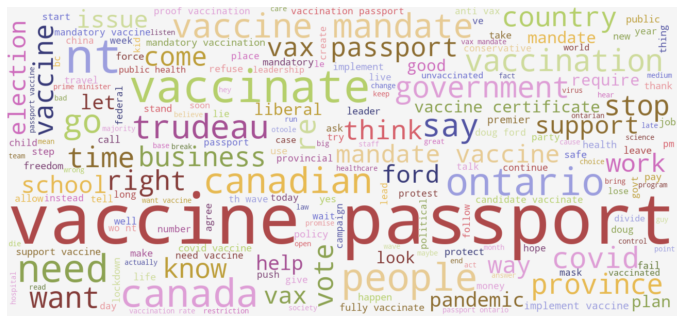

In [25]:
tweet_str = [] # Making string of tweet data
for t in topic1_df['Text']:
  tweet_str.append(t)
tweet_str = pd.Series(tweet_str).str.cat(sep=' ')

tweet_cloud = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
common_words1 = get_top_n_trigram(tweets_list1, 15)
df1 = pd.DataFrame(common_words1, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df1['trigram'], y=df1['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Trigrams"))
fig.show()

In [45]:
tf_vectorizer1 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf1 = tf_vectorizer1.fit_transform(tweets_list1) # document-term matrix

lda_model4_1 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf1) 

pyLDAvis.enable_notebook()
display_data1 = pyLDAvis.sklearn.prepare(lda_model4_1, tf1, tf_vectorizer1)                 
pyLDAvis.display(display_data1)   

#Topic 2

In [29]:
tweets_list2 = topic2_df['Text'].tolist()

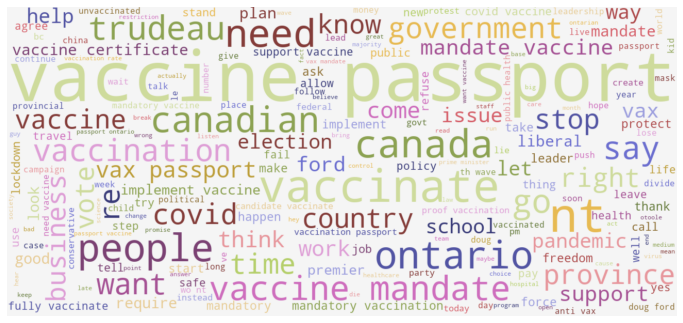

In [30]:
tweet_str2 = [] # Making string of tweet data
for t in topic2_df['Text']:
  tweet_str2.append(t)
tweet_str2 = pd.Series(tweet_str2).str.cat(sep=' ')

tweet_cloud2 = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
common_words2 = get_top_n_trigram(tweets_list2, 15)
df2 = pd.DataFrame(common_words2, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['trigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Trigrams"))
fig.show()

#Topic 3

In [39]:
tweets_list3 = topic3_df['Text'].tolist()

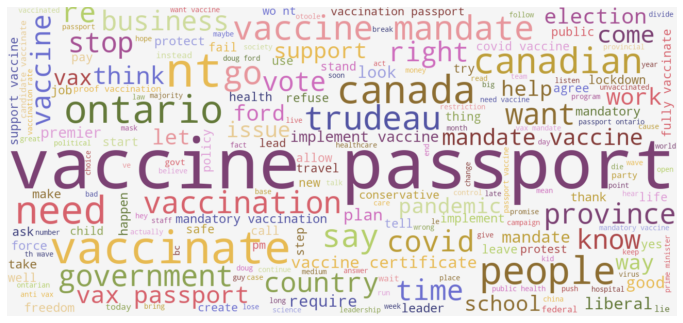

In [40]:
tweet_str3 = [] # Making string of tweet data
for t in topic3_df['Text']:
  tweet_str3.append(t)
tweet_str3 = pd.Series(tweet_str3).str.cat(sep=' ')

tweet_cloud3 = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud3, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
common_words3 = get_top_n_trigram(tweets_list3, 15)
df3 = pd.DataFrame(common_words3, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['trigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Trigrams"))
fig.show()

In [46]:
tf_vectorizer3 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf3 = tf_vectorizer3.fit_transform(tweets_list3) # document-term matrix

lda_model4_3 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf3) 

pyLDAvis.enable_notebook()
display_data3 = pyLDAvis.sklearn.prepare(lda_model4_3, tf3, tf_vectorizer3)                 
pyLDAvis.display(display_data3)

#Topic 4

In [42]:
tweets_list4 = topic4_df['Text'].tolist()

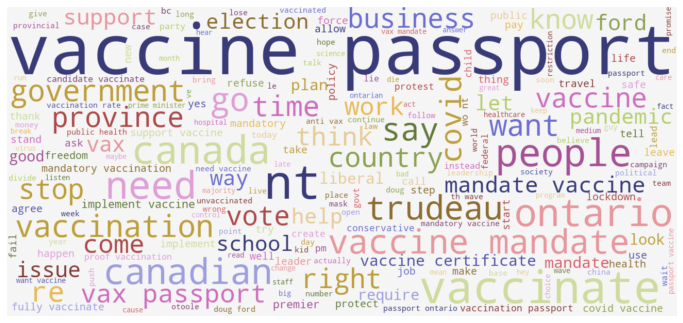

In [43]:
tweet_str4 = [] # Making string of tweet data
for t in topic4_df['Text']:
  tweet_str4.append(t)
tweet_str4 = pd.Series(tweet_str4).str.cat(sep=' ')

tweet_cloud4 = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud4, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
common_words4 = get_top_n_trigram(tweets_list4, 15)
df4 = pd.DataFrame(common_words4, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Trigrams"))
fig.show()

In [48]:
tf_vectorizer4 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf4 = tf_vectorizer4.fit_transform(tweets_list4) # document-term matrix

lda_model3_4 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf4) 

pyLDAvis.enable_notebook()
display_data4 = pyLDAvis.sklearn.prepare(lda_model3_4, tf4, tf_vectorizer4)                 
pyLDAvis.display(display_data4)